In [36]:
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
import cartopy.crs as ccrs
%matplotlib inline

In [45]:
air_temp =  xr.open_dataset('ta_MLS_L3_v03-3x_200408-201012.nc')
df = air_temp.to_dataframe()

In [8]:
df.head()

time_bnds  lat_bnds  lon_bnds  ta
bnds lat   lon plev     time                                                  
0    -89.0 0.0 100000.0 2004-08-17 00:00:00     1674.0     -90.0      -2.5 NaN
                        2004-09-16 12:00:00     1705.0     -90.0      -2.5 NaN
                        2004-10-17 00:00:00     1735.0     -90.0      -2.5 NaN
                        2004-11-16 12:00:00     1766.0     -90.0      -2.5 NaN
                        2004-12-17 00:00:00     1796.0     -90.0      -2.5 NaN

In [9]:
df.describe()

,time_bnds,lat_bnds,lon_bnds,ta
count,2.295216e+07,2.295216e+07,2.295216e+07,1.362890e+07
mean,2.845636e+03,0.000000e+00,1.775000e+02,2.281771e+02
std,6.766276e+02,5.196794e+01,1.039431e+02,2.016593e+01
min,1.674000e+03,-9.000000e+01,-2.500000e+00,1.787903e+02
25%,2.251000e+03,-4.450000e+01,8.750000e+01,2.140441e+02
50%,2.845500e+03,0.000000e+00,1.775000e+02,2.241957e+02
75%,3.439000e+03,4.450000e+01,2.675000e+02,2.435092e+02
max,4.018000e+03,9.000000e+01,3.575000e+02,2.937771e+02


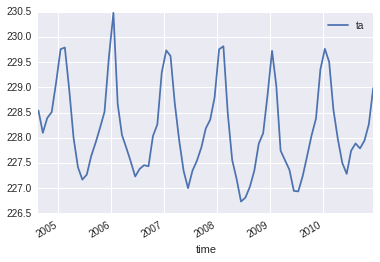

In [50]:
air_temp.mean(dim=["lat", "lon", "plev", "bnds"])["ta"].to_dataframe().plot()

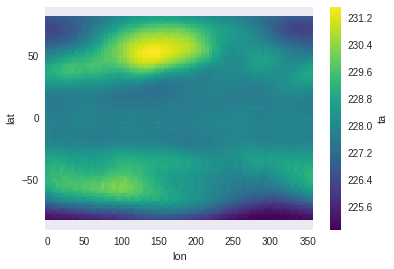

In [85]:
air_temp.mean(dim=["time", "plev", "bnds"], skipna=True)["ta"].plot()

In [64]:
air_temp

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 90, lon: 72, plev: 23, time: 77)
Coordinates:
  * time       (time) datetime64[ns] 2004-08-17 2004-09-16T12:00:00 ...
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 6e+04 5e+04 4e+04 ...
  * lat        (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 -79.0 -77.0 -75.0 ...
  * lon        (lon) float64 0.0 5.0 10.0 15.0 20.0 25.0 30.0 35.0 40.0 45.0 ...
  * bnds       (bnds) int64 0 1
Data variables:
    time_bnds  (time, bnds) float64 1.674e+03 1.705e+03 1.705e+03 1.735e+03 ...
    lat_bnds   (lat, bnds) float64 -90.0 -88.0 -88.0 -86.0 -86.0 -84.0 -84.0 ...
    lon_bnds   (lon, bnds) float64 -2.5 2.5 2.5 7.5 7.5 12.5 12.5 17.5 17.5 ...
    ta         (time, plev, lat, lon) float64 nan nan nan nan nan nan nan ...
Attributes:
    institution: National Aeronautics and Space Administration, Jet Propulsion Laboratory (Pasadena, CA)
    institute_id: NASA-JPL
    experiment_id: obs
    source: MLS 2004 v03.3 (Microwave Limb Sounder) retrie

Reduce this Dataset's data by applying `mean` along some
        dimension(s).

        Parameters
        ----------
        dim : str or sequence of str, optional
            Dimension(s) over which to apply `func`.  By default `func` is
            applied over all dimensions.
        skipna : bool, optional
            If True, skip missing values (as marked by NaN). By default, only
            skips missing values for float dtypes; other dtypes either do not
            have a sentinel missing value (int) or skipna=True has not been
            implemented (object, datetime64 or timedelta64).
        keep_attrs : bool, optional
            If True, the attributes (`attrs`) will be copied from the original
            object to the new one.  If False (default), the new object will be
            returned without attributes.
        **kwargs : dict
            Additional keyword arguments passed on to `mean`.

        Returns
        -------
        reduced : Dataset
            Ne